# Lab: Pandas practice with the buildings dataset

This Lab will give you some practice with Pandas and the buildings dataset that we went over in class.

**NOTE \#1: It is *highly* recommended that you hit "Save & Grade" after you answer each prompt in order to catch any errors in order.**

**NOTE \#2: Make sure you don't accidentally overwrite any of the variables (for example `stats2=stats` will then change `stats` if you make changes to `stats2` so you'll want to use `stats = stats2.copy()` instead).**

## Setup

<p>The buildings dataset shows the Illinois usage data for all governmental buildings as found <a href='https://data.illinois.gov/dataset/87building_inventory'>on the Illinois data repository</a>.</p><p>Read in the dataset using Pandas and the following url: <a href='https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/building_inventory.csv'>https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/building_inventory.csv</a>.</p>  <p><b>Call this dataframe <code>buildings</code>. </p><p>HINT: what should you do with 0 values in each column?<p>

In [1]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
import pandas as pd
buildings = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/building_inventory.csv',
                        na_values = {
                    'Square Footage':0,
                       'Year Constructed': 0,
                       'Year Acquired' : 0,
                            'Total Floors': 0
                        })
buildings['Total Floors'].min()

1.0

## Calculation #1

<p>In this portion of the lab, you will calculate the median 'Year Acquired' per 'Bldg Status' using a groupby.</p><p>To do this, group by 'Bldg Status' (<code>groupby('Bldg Status')</code>) and pass the 'Year Acquired' (<code>['Year Acquired']</code>), and finally take a median (<code>.median()</code>).</p><p><b>Call this variable <code>gb1</code>.</b></p>

In [2]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
buildings_1 = buildings.copy()
gb1 = buildings_1.groupby('Bldg Status')['Year Acquired'].median()
gb1

Bldg Status
Abandon        1960.0
In Progress    2012.0
In Use         1976.0
Name: Year Acquired, dtype: float64

## Calculation #2

<p>Do the same calculation as for <code>gb1</code> (median 'Year Acquired' per 'Bldg Status'), but for the first 100 rows of the buildings dataframe that is first sorted by 'Year Constructed'.</p><p><b>Call this dataframe <code>gb2</code></b>.</p>

In [34]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
buildings_1 = buildings_1.sort_values('Year Constructed')
gb2 = buildings_1.iloc[0:100].groupby('Bldg Status')['Year Acquired'].median()
gb2

Bldg Status
In Use    1864.0
Name: Year Acquired, dtype: float64

## Calculation #3

### Step 1:

<p>In this portion of the lab, you will create a dataframe of various statistics of 'Square Footage' in each 'Year Constructed' using a groupby.</p><p>To do this, group by 'Year Constructed' and pass the 'Square Footage', and finally use the <code>describe</code> function to calculate the new dataframe (<code>.describe()</code>).</p><p><b>Call this new dataframe <code>stats</code>.</b></p>

In [5]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
stats = buildings_1.groupby('Year Constructed')['Square Footage'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
Year Constructed,,,,,,,,
1753.0,6.0,2500.166667,1390.184220,558.0,1545.0,2727.5,3421.75,4184.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1812.0,1.0,5500.000000,NaN,5500.0,5500.0,5500.0,5500.00,5500.0
1815.0,1.0,800.000000,NaN,800.0,800.0,800.0,800.00,800.0
...,...,...,...,...,...,...,...,...
2015.0,23.0,22120.565217,44844.829950,144.0,750.5,3840.0,17021.00,185525.0
2016.0,17.0,15517.470588,43862.100880,250.0,2464.0,3600.0,6000.00,184000.0
2017.0,5.0,2220.600000,2730.736860,288.0,512.0,660.0,2923.00,6720.0


### Step 2:

<p>Make a copy of the <code>stats</code> dataframe and <b>call it <code>stats2</code></b>.</p><p>The index of the <code>stats2</code> dataframe is a float by default, but we want it to be a datetime object.</p><p>Turn the index into a datetime object with the following:</p><pre>stats2.index = pd.to_datetime(stats2.index.astype('int'),errors='coerce',format='%Y')</pre><p></p><p>The above first turns the stats2 index into an integer, and then uses that integer format and translates it into a datetime format assuming it is in the '%Y', i.e. just the 4-digit year, format.</p>

In [27]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
stats2 = stats.copy()
stats2.index = pd.to_datetime(stats2.index.astype('int'),errors='coerce',format='%Y')
stats2

,count,mean,std,min,25%,50%,75%,max
Year Constructed,,,,,,,,
1753-01-01,6.0,2500.166667,1390.184220,558.0,1545.0,2727.5,3421.75,4184.0
1802-01-01,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810-01-01,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1812-01-01,1.0,5500.000000,NaN,5500.0,5500.0,5500.0,5500.00,5500.0
1815-01-01,1.0,800.000000,NaN,800.0,800.0,800.0,800.00,800.0
...,...,...,...,...,...,...,...,...
2015-01-01,23.0,22120.565217,44844.829950,144.0,750.5,3840.0,17021.00,185525.0
2016-01-01,17.0,15517.470588,43862.100880,250.0,2464.0,3600.0,6000.00,184000.0
2017-01-01,5.0,2220.600000,2730.736860,288.0,512.0,660.0,2923.00,6720.0


### Step 3:

<p>Plot of the median 'Square Footage' as a function of 'Year Constructed' using the <code>stats2</code> variable.</p><p><b>Call this figure, <code>fig</code> and create it with our usual construction: <code>fig, ax = plt.subplots()</code></b></p><p>To show the full range of the median, use a log for the y-scale (using matplotlib commands, <b>not</b> with any changes to the data).</p><p>Label the y-axis as 'Median Square Footage' and the x-axis as 'Year Constructed'.</p>

Text(0.5, 0, 'Year Constructed')

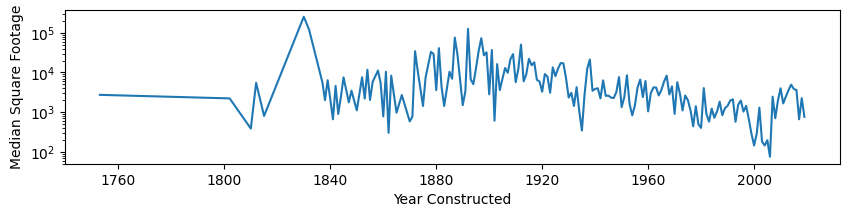

In [33]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,2))
ax.plot(stats2['50%'])
ax.set_yscale('log')
ax.set_ylabel('Median Square Footage')
ax.set_xlabel('Year Constructed')